In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [2]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("happy-or-sad.zip", 'r')
zip_ref.extractall("h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>DESIRED_ACCURACY):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [17]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
    # layer 1
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # layer 2
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # layer 3
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten results
    tf.keras.layers.Flatten(),
    # DNN
    tf.keras.layers.Dense(512, activation='relu'),
    # Output
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

print(model.summary())

from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=0.001),
    metrics=['accuracy']
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 78400)            

In [18]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    "h-or-s",
    target_size=(300, 300),
    batch_size=10,
    class_mode='binary',
)

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [19]:
# This code block should call model.fit and train for
# a number of epochs. 
history = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    callbacks=[callbacks]
)
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/15
8/8 [==============================] - 13s 2s/step - loss: 7.8955 - accuracy: 0.6250
Epoch 2/15
8/8 [==============================] - 14s 2s/step - loss: 1.1414 - accuracy: 0.6625
Epoch 3/15
8/8 [==============================] - 14s 2s/step - loss: 0.5149 - accuracy: 0.7875
Epoch 4/15
8/8 [==============================] - 15s 2s/step - loss: 0.3913 - accuracy: 0.8625
Epoch 5/15
8/8 [==============================] - 13s 2s/step - loss: 0.2052 - accuracy: 0.9000
Epoch 6/15
8/8 [==============================] - 13s 2s/step - loss: 0.3773 - accuracy: 0.8875
Epoch 7/15
8/8 [==============================] - 13s 2s/step - loss: 0.6284 - accuracy: 0.8625
Epoch 8/15
8/8 [==============================] - 12s 1s/step - loss: 0.0642 - accuracy: 0.9750
Epoch 9/15
8/8 [==============================] - 13s 2s/step - loss: 0.0421 - accuracy: 0.9875
Epoch 10/15
8/8 [==============================] - 13s 2s/step - loss: 0.6069 - accuracy: 0.8500
Epoch 11/15
8/8 [======================

# Try to see if it works with some data!

In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image

directory = 'validation/'

for fn in os.listdir(directory):
    # predicting images
    path = directory + fn
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    print(len(images))
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a happy")
    else:
        print(fn + " is a sad")

1
[1.]
ball-1845546_1920.jpg is a happy
1
[0.]
blossom-233838_1920.jpg is a sad
1
[1.]
christmas-2411764_1920.jpg is a happy
1
[1.]
disapprove-149251_1280.png is a happy
1
[1.]
emoji-4688380_1920.png is a happy
1
[1.]
emoji-5258627_1280.png is a happy
1
[1.]
emoticon-1626442_1920.png is a happy
1
[1.]
emoticon-3437387_1920.jpg is a happy
1
[1.]
happy-35164_1280.png is a happy
1
[1.]
pumpkin-2892303_1920.jpg is a happy
1
[1.]
sad-1533965_1920.jpg is a happy
1
[1.]
smiley-163510_1280.jpg is a happy
1
[1.]
smiley-1635450_1280.png is a happy
1
[1.]
smiley-2979107_1920.jpg is a happy


# See how the features are being extracted

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt

# Directory with our training horse pictures
train_happy_dir = os.path.join('/h-or-s/happy/')

# Directory with our training human pictures
train_sad_dir = os.path.join('/h-or-s/sad/')

train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])

train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])

['happy1-00.png', 'happy1-01.png', 'happy1-02.png', 'happy1-03.png', 'happy1-04.png', 'happy1-05.png', 'happy1-06.png', 'happy1-07.png', 'happy1-08.png', 'happy1-09.png']
['sad1-00.png', 'sad1-01.png', 'sad1-02.png', 'sad1-03.png', 'sad1-04.png', 'sad1-05.png', 'sad1-06.png', 'sad1-07.png', 'sad1-08.png', 'sad1-09.png']


<ipython-input-22-913f05996a11>:43: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


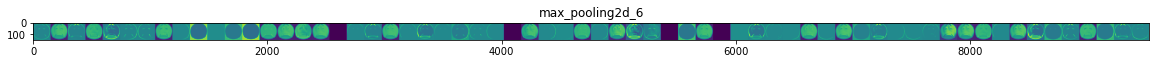

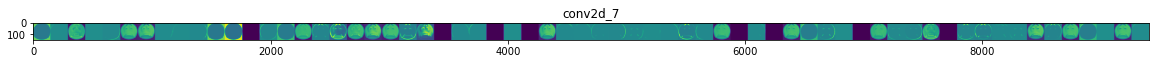

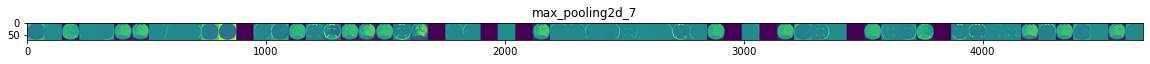

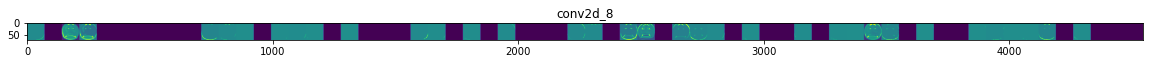

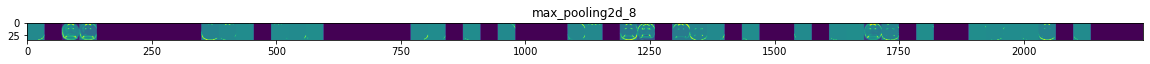

In [22]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_happy_dir, f) for f in train_happy_names]
human_img_files = [os.path.join(train_sad_dir, f) for f in train_sad_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
          # Postprocess the feature to make it visually palatable
          x = feature_map[0, :, :, i]
          x -= x.mean()
          x /= x.std()
          x *= 64
          x += 128
          x = np.clip(x, 0, 255).astype('uint8')
          # We'll tile each filter into this big horizontal grid
          display_grid[:, i * size : (i + 1) * size] = x
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')